### Lab 8. Analysis of cluster samples in PROC SURVEYMEANS
#### MSDS 6370
#### Albert Asuncion

Objective:
* For the student to learn about cluster sampling.
* For the student to continue learning about SAS procedures for forming estimates using cluster samples.

Introduction:
The topic of the reading material for Asynchronous Lecture 6 was a discussion of cluster sampling and aspects of the design and implementation of cluster samples.  In this lab, we continue to study forming estimates with data collected in a cluster sample using SAS.  

Estimating the mean with data from a cluster sample using SAS:
You will learn how to use SAS PROC SURVEYMEANS to analyze data from a cluster sample. The Excel file lab8Dat.xlsx contains an encounters sheet and patients sheet with data from a sample selected for an audit of a health care provider. We used these data sets in Homework 3 where we assumed it was the whole population and selected a PPS of patients.  In this Lab 8, we analyze it as a sample. The objective of the audit was to estimate the total overpayment by an insurance company to a medical provider.   
Sometimes you will get data from a cluster sample as individual values and sometimes you will get it as sums over the clusters.  In the audit case, the individual values are encounters and the clusters are patients.
For our dataset, a cluster design was used to select payments to include in the sample. The clusters were patients, and all the payments made on the sampled patients accounts were included, thus producing a cluster sample of payments.  For this lab we assume patients are selected according to an SRS design.
Now, the way to estimate the total overpayment is to estimate the mean of the sample data and then multiply by the total observations in the population, N.  The standard error of the total is the standard error of the mean multiplied by N.  These values can be expressed with the formulas below:
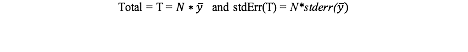
For this Lab, you will use the cluster option in PROC SURVEYMEANS shown below:
`CLUSTER varname;`
In the case of the audit data, the `varname=Patient`;

### Analysis 1
The following SAS code will produce estimates of total overpayment from the audit sample found in the encounters sheet.


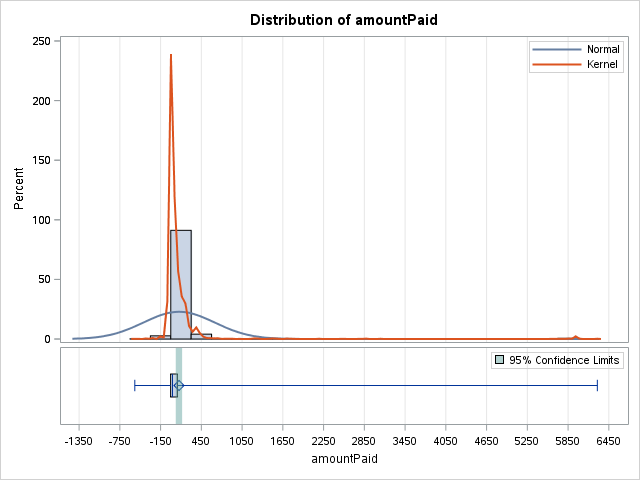
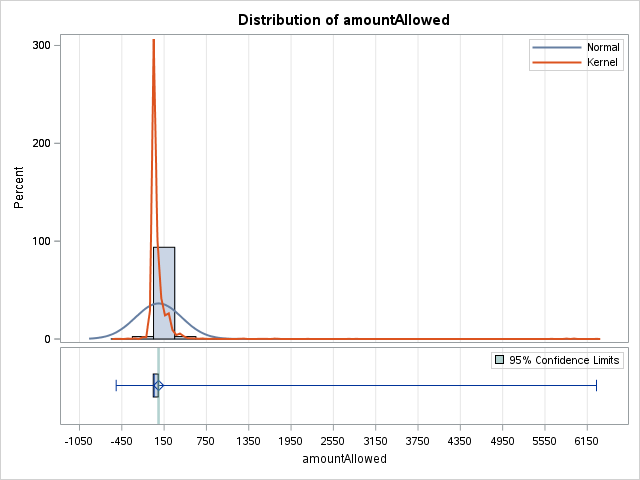
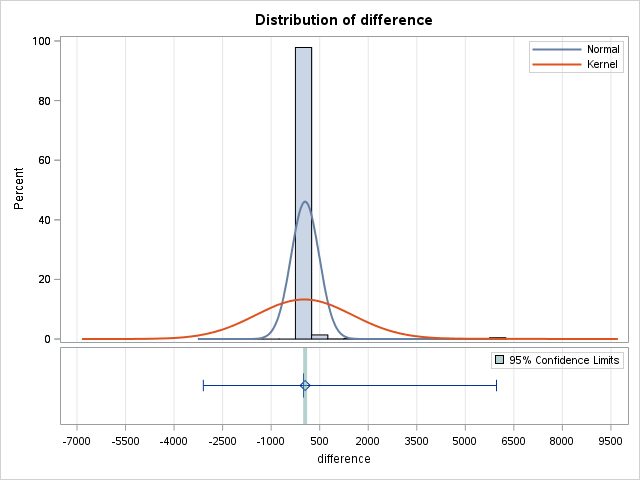

In [44]:
filename reffile '/folders/myfolders/lab8Dat.xlsx';
proc import datafile=reffile dbms=xlsx out=work.encData;
    sheet = 'encounters';
    getnames=yes;
run;

title "Inital output enc";
proc surveymeans data = encData total=11426 mean;
    var amountPaid amountAllowed difference;
    cluster patNum;
run;

### Analysis 2
In the patients sheet the sample data set has been "rolled up" to the patient level, and all the variables reported are summed (e.g., sum of paid, allowed, and overpayment amounts). The following SAS code produces estimates of total overpayment from the audit sample found in the patients sheet.


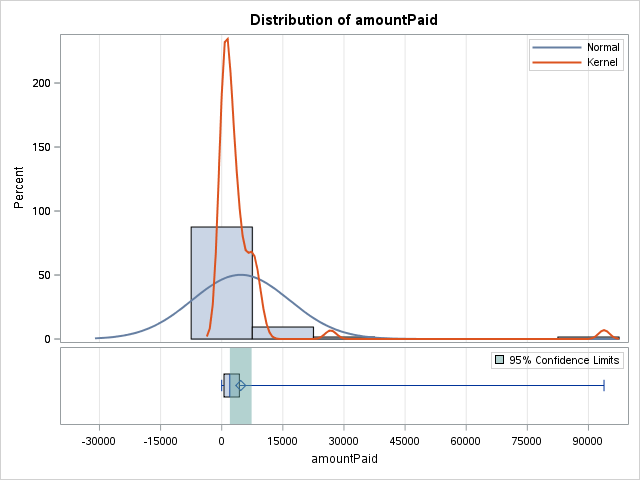
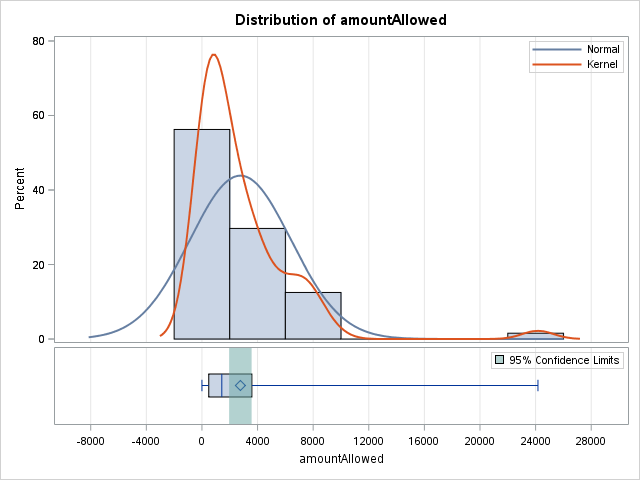
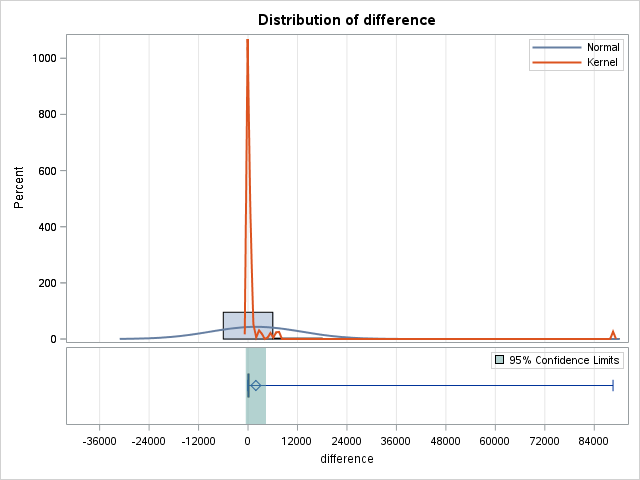

In [45]:
filename reffile '/folders/myfolders/lab8Dat.xlsx';
proc import datafile=reffile dbms=xlsx out=work.patData;
    sheet = 'patients';
    getnames=yes;
run;

title "Inital output enc";
proc surveymeans data = patData total=296 mean;
    var amountPaid amountAllowed difference;
    cluster patNum;
run;

Now, the estimates of the totals of these variables and their standard errors are shown below:
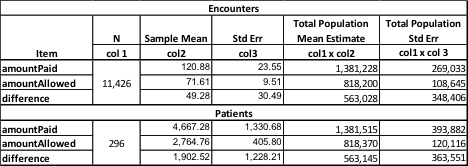

***

## Exercise 1

1- Rerun Analysis 1 and 2, but remove the `CLUSTER` option from `PROC SURVEYMEANS`:


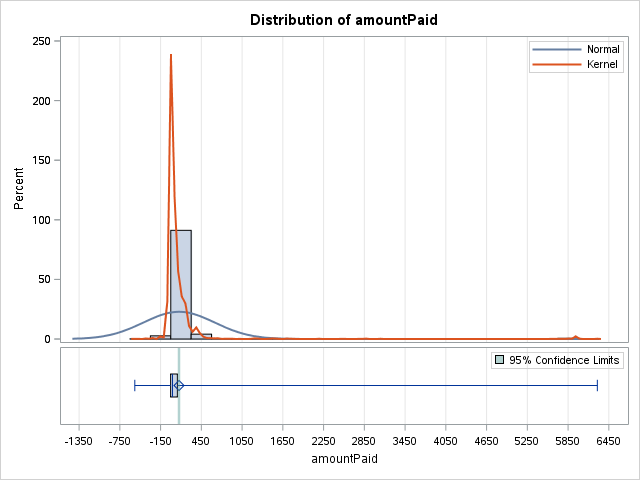
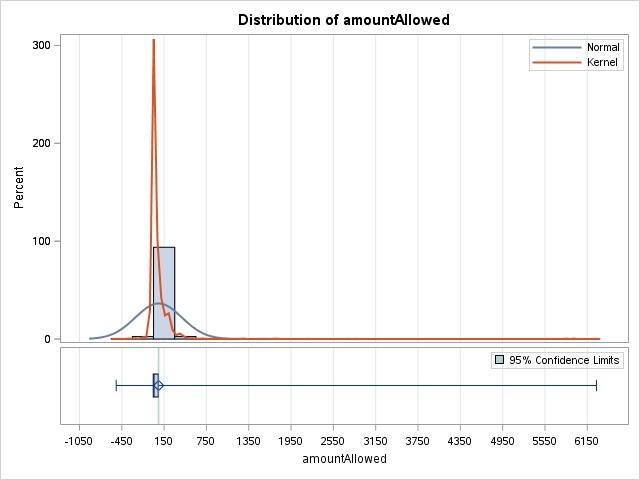
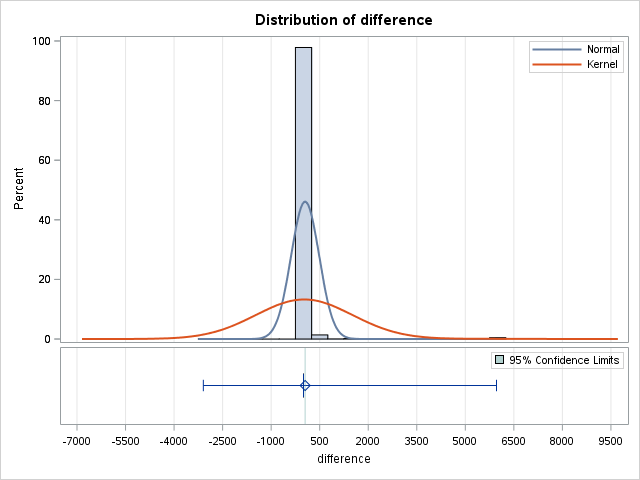

In [46]:
/* ANALYSIS 1 */

filename reffile '/folders/myfolders/lab8Dat.xlsx';
proc import datafile=reffile dbms=xlsx out=work.encData;
    sheet = 'encounters';
    getnames=yes;
run;

title "Inital output enc";
proc surveymeans data = encData total=11426 mean;
    var amountPaid amountAllowed difference;

run;


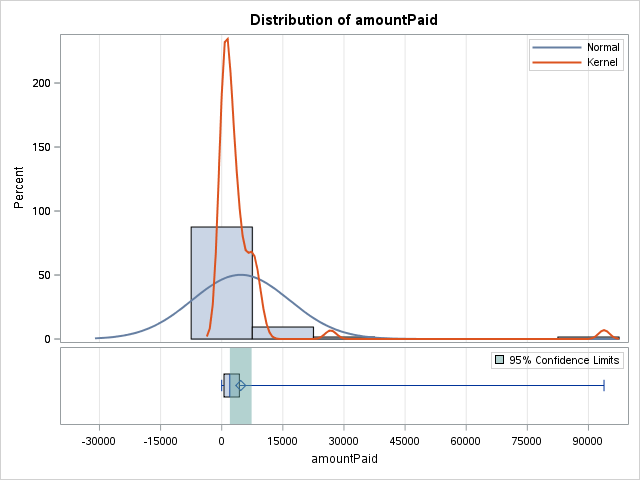
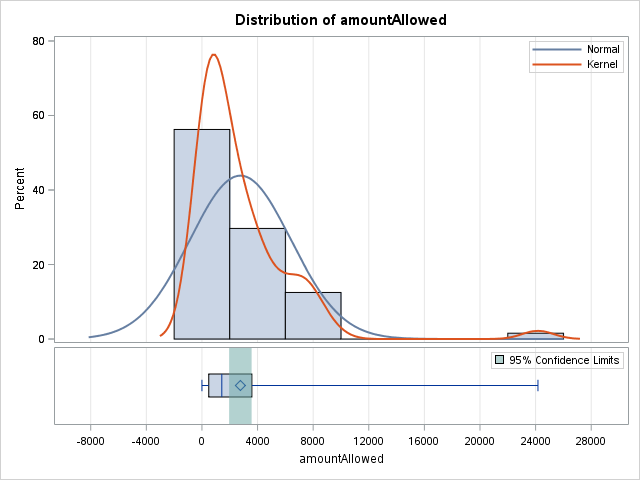
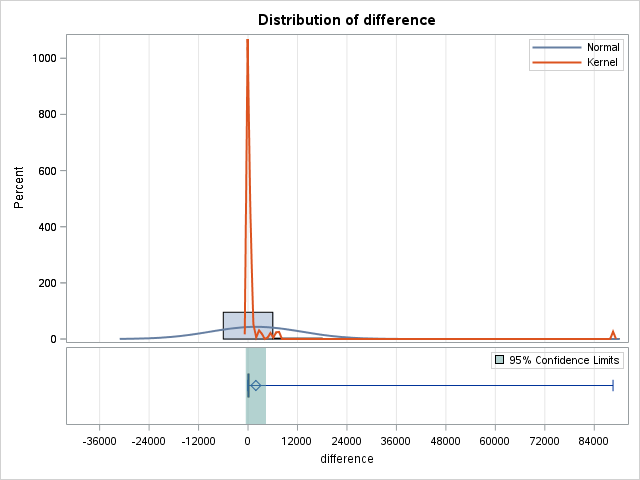

In [47]:
/* ANALYSIS 2 */

filename reffile '/folders/myfolders/lab8Dat.xlsx';
proc import datafile=reffile dbms=xlsx out=work.patData;
    sheet = 'patients';
    getnames=yes;
run;

title "Inital output enc";
proc surveymeans data = patData total=296 mean;
    var amountPaid amountAllowed difference;

run;

2- You should get a different standard error for Analysis 1 without the CLUSTER statement. Explain why the standard error is smaller. Which standard error is correct if the sample design is a simple random sample of patients?

> <font color=blue>**Answer:**</font> _In analysis 1, there were 64 clusters compared to only 1 cluster in Analysis 2. Since the total variance is the sum of individual cluster variances, the total variance and standard error will therefore be higher when there are multiple clusters in the analysis._<br> 
_The higher standard error is correct since it accounts for the different clusters._

3- Do you get a different standard error for Analysis 2? Why or why not?

> <font color=blue>**Answer:**</font> _No the standard error for Analysis 2 remained the same since there were no clusters in the patient dataset._<br>

4- What does this tell you about when you must use the CLUSTER option?

> <font color=blue>**Answer:**</font> _The `CLUSTER` option is only useful when there are known clusters in the dataset._<br>

***

## Exercise 2

1- Redo Analysis 1, but this time, take into account the stratification.  You need to add the STRATA statement and Total option. Use the stratum sizes below for the Total option:

EncounterStrata	NumInStrataPop<br>
1	12<br>
2	215<br>
3	1248<br>
4	1607<br>
5	58<br>
6	7116<br>
7	335<br>
8	827<br>
9	8<br>
Total	11426<br>

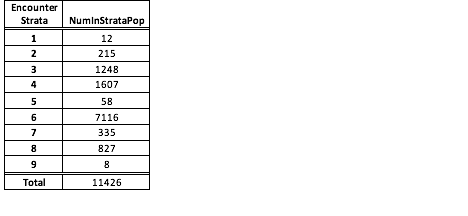


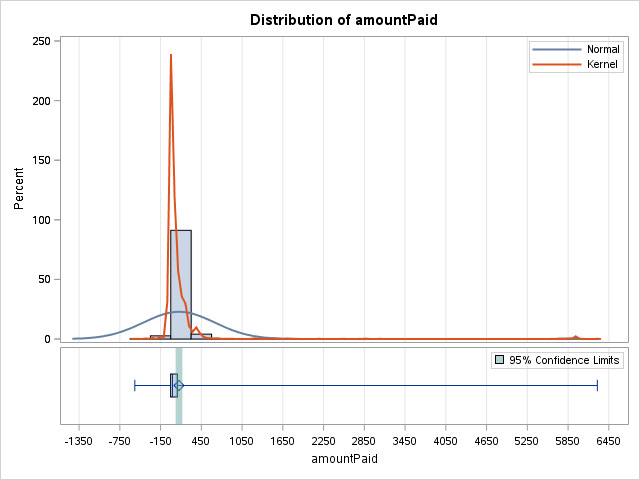
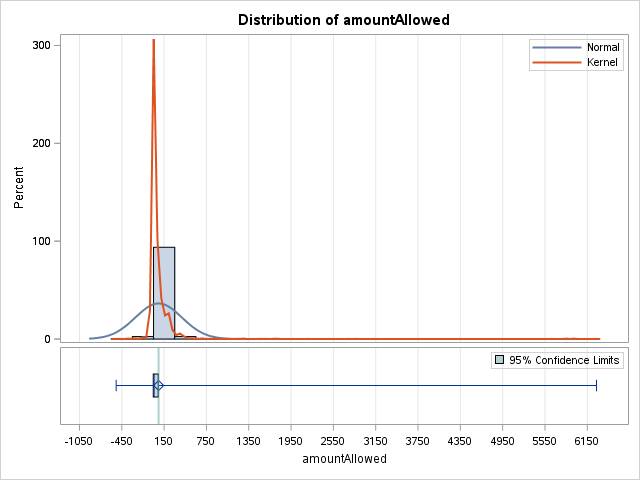
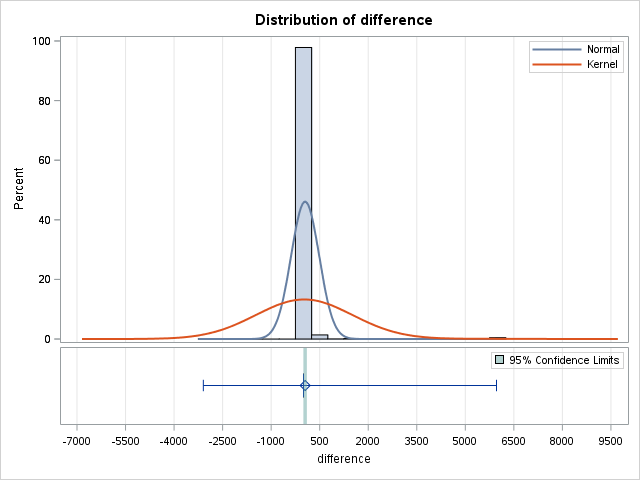

In [48]:
filename reffile '/folders/myfolders/lab8Dat.xlsx';
proc import datafile=reffile dbms=xlsx out=work.encData;
    sheet = 'encounters';
    getnames=yes;
run;

data stratumsize;
input stratum _total_;
datalines;
1 12
2 215
3 1248
4 1607
5 58
6 7116
7 335
8 827
9 8
;

title "Inital output enc";
proc surveymeans data = encData total=stratumsize mean;
    stratum stratum;
    var amountPaid amountAllowed difference;
    cluster patNum;
run;

2- Comment on the results. Did stratification help the precision?

> <font color=blue>**Answer:**</font> _Stratification improved accuracy. The standard error of the difference is lower at 27 compared to 30 in the unstratified model._<br>

***

## Exercise 3

1- Repeat Analysis 2, but this time, take into account the stratification. You need to add the STRATA statement and Total option. Use the stratum sizes below for the Total option:

PatientStrata	NumInStrataPop<br>
1 	245<br>
2	23<br>
3	9<br>
4	14<br>
5	5<br>
Total	296<br>

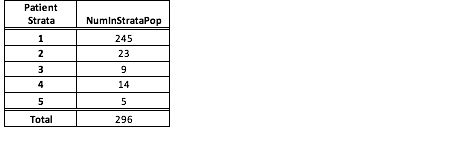


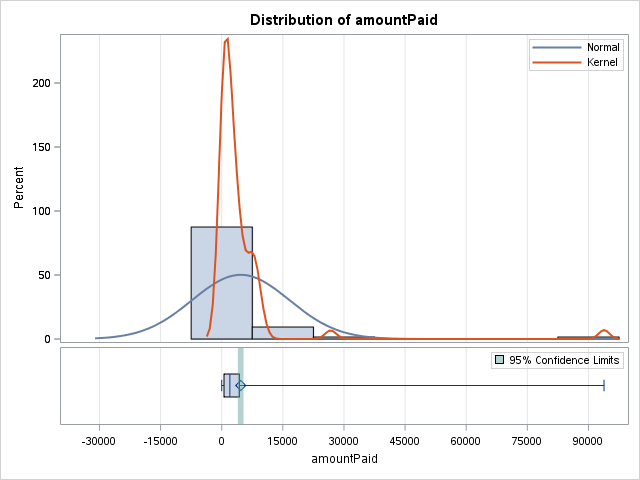
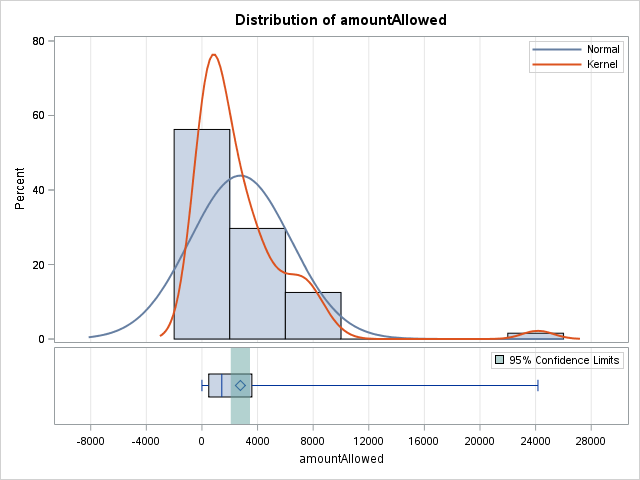
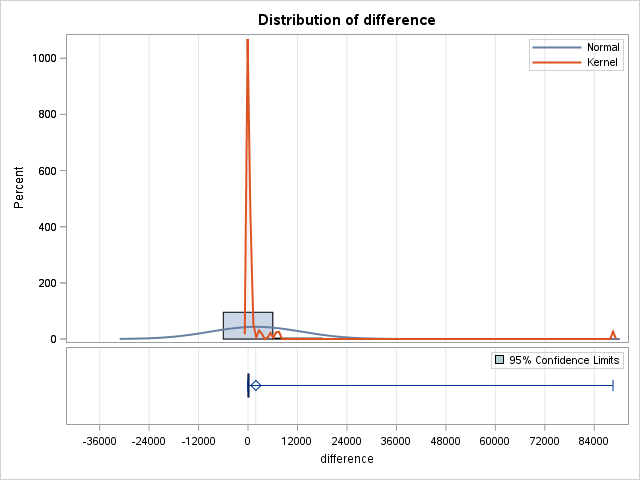

In [49]:
filename reffile '/folders/myfolders/lab8Dat.xlsx';
proc import datafile=reffile dbms=xlsx out=work.patData;
    sheet = 'patients';
    getnames=yes;
run;

data stratumsize2;
input stratum _total_;
datalines;
1 245
2 23
3 9
4 14
5 5
;

title "Inital output enc";
proc surveymeans data = patData total=stratumsize2 mean;
    stratum stratum;
    var amountPaid amountAllowed difference;
    cluster patNum;
run;

2- Comment on the results. Did stratification help the precision?

> <font color=blue>**Answer:**</font> _Stratification improved accuracy significantly. The standard error of the difference is only 30 compared to 1228 in the unstratified model._<br>